# Acquire

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Read the data
df = pd.read_csv('data/loan_data.csv')

In [4]:
df.head()

,default,amount,interest,grade,years,ownership,income,age
0,0,5000,10.65,B,10.0,RENT,24000.0,33
1,0,2400,NaN,C,25.0,RENT,12252.0,31
2,0,10000,13.49,C,13.0,RENT,49200.0,24
3,0,5000,NaN,A,3.0,RENT,36000.0,39
4,0,3000,NaN,E,9.0,RENT,48000.0,24


In [5]:
df.describe()

,default,amount,interest,years,income,age
count,29092.000000,29092.000000,26316.000000,28283.000000,2.909200e+04,29092.000000
mean,0.110924,9593.505947,11.004567,6.145282,6.716883e+04,27.702117
std,0.314043,6323.416157,3.239012,6.677632,6.360652e+04,6.231927
min,0.000000,500.000000,5.420000,0.000000,4.000000e+03,20.000000
25%,0.000000,5000.000000,7.900000,2.000000,4.000000e+04,23.000000
50%,0.000000,8000.000000,10.990000,4.000000,5.642400e+04,26.000000
75%,0.000000,12250.000000,13.470000,8.000000,8.000000e+04,30.000000
max,1.000000,35000.000000,23.220000,62.000000,6.000000e+06,144.000000


In [6]:
df.shape

(29092, 8)

## Refine
- Missing Values (NAN)
- Outliers

In [7]:
df.dtypes

default        int64
amount         int64
interest     float64
grade         object
years        float64
ownership     object
income       float64
age            int64
dtype: object

In [8]:
df.isnull().head()

,default,amount,interest,grade,years,ownership,income,age
0,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False
4,False,False,True,False,False,False,False,False


In [9]:
df.isnull().sum()

default         0
amount          0
interest     2776
grade           0
years         809
ownership       0
income          0
age             0
dtype: int64

In [10]:
df.shape[0]

29092

In [11]:
df.dtypes

default        int64
amount         int64
interest     float64
grade         object
years        float64
ownership     object
income       float64
age            int64
dtype: object

Options to treat Missing Values
- **REMOVE** - NAN rows
- **IMPUTATION** - Replace them with something ?? 
    - Mean 
    - Median
    - Fixed Number - Domain Relevant
    - High Number (999) - Issue with modelling
- **BINNING** - Categorical variable and "Missing becomes a number*
- **DOMAIN SPECIFIC** - Entry error, pipeline, etc.

In [12]:
df.interest.mean()

11.004566803465574

In [13]:
df.fillna(df.mean(), inplace=True).head()

,default,amount,interest,grade,years,ownership,income,age
0,0,5000,10.650000,B,10.0,RENT,24000.0,33
1,0,2400,11.004567,C,25.0,RENT,12252.0,31
2,0,10000,13.490000,C,13.0,RENT,49200.0,24
3,0,5000,11.004567,A,3.0,RENT,36000.0,39
4,0,3000,11.004567,E,9.0,RENT,48000.0,24


In [14]:
df.fillna?

In [15]:
df.isnull().sum()

default      0
amount       0
interest     0
grade        0
years        0
ownership    0
income       0
age          0
dtype: int64

In [16]:
df['grade'].unique()

array(['B', 'C', 'A', 'E', 'D', 'F', 'G'], dtype=object)

In [17]:
df['ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

## Outliers

In [18]:
df.describe()

,default,amount,interest,years,income,age
count,29092.000000,29092.000000,29092.000000,29092.000000,2.909200e+04,29092.000000
mean,0.110924,9593.505947,11.004567,6.145282,6.716883e+04,27.702117
std,0.314043,6323.416157,3.080597,6.584127,6.360652e+04,6.231927
min,0.000000,500.000000,5.420000,0.000000,4.000000e+03,20.000000
25%,0.000000,5000.000000,8.490000,2.000000,4.000000e+04,23.000000
50%,0.000000,8000.000000,11.004567,4.000000,5.642400e+04,26.000000
75%,0.000000,12250.000000,13.110000,8.000000,8.000000e+04,30.000000
max,1.000000,35000.000000,23.220000,62.000000,6.000000e+06,144.000000


{'boxes': [<matplotlib.lines.Line2D at 0x10c945ac8>],
 'caps': [<matplotlib.lines.Line2D at 0x10c977e48>,
 'fliers': [<matplotlib.lines.Line2D at 0x10cb086a0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x10c970eb8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1006c6eb8>,
  <matplotlib.lines.Line2D at 0x10c977cc0>]}

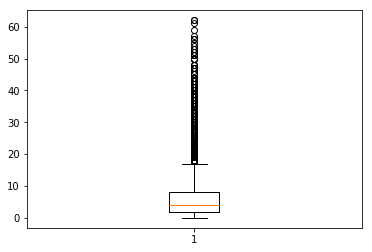

In [19]:
plt.boxplot(df.years)

In [20]:
import seaborn as sns

/Users/amitkaps/miniconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


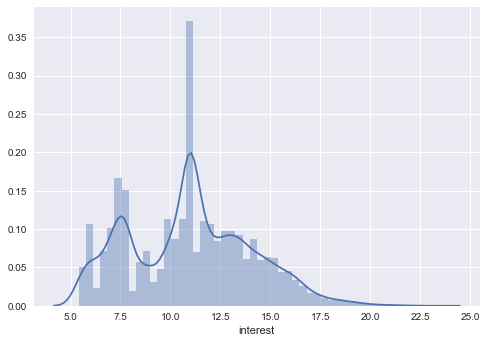

In [21]:
sns.distplot(df.interest)

/Users/amitkaps/miniconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


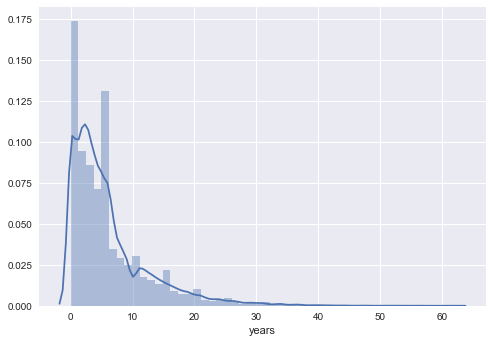

In [22]:
sns.distplot(df.years)

(array([  2.40990000e+04,   4.31900000e+03,   5.79000000e+02,
          7.90000000e+01,   1.30000000e+01,   2.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([  20. ,   32.4,   44.8,   57.2,   69.6,   82. ,   94.4,  106.8,
         119.2,  131.6,  144. ]),
 <a list of 10 Patch objects>)

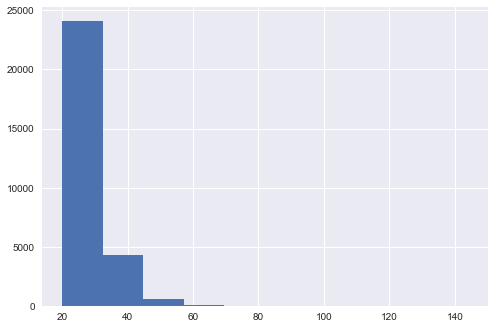

In [23]:
plt.hist(df.age)

/Users/amitkaps/miniconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


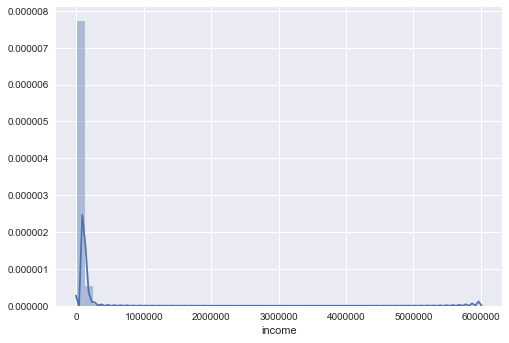

In [24]:
sns.distplot(df.income)

In [25]:
df[df.age > 100]

,default,amount,interest,grade,years,ownership,income,age
19485,0,5000,12.73,C,12.0,MORTGAGE,6000000.0,144


In [26]:
df[df.income > 1000000]

,default,amount,interest,grade,years,ownership,income,age
4860,0,12025,14.270000,C,13.0,RENT,1782000.0,63
13930,0,10000,6.540000,A,16.0,OWN,1200000.0,36
15385,0,1500,11.004567,A,5.0,MORTGAGE,1900000.0,60
16712,0,12000,7.510000,A,1.0,MORTGAGE,1200000.0,32
19485,0,5000,12.730000,C,12.0,MORTGAGE,6000000.0,144
22810,0,10000,11.004567,A,1.0,MORTGAGE,1200000.0,40
23360,0,6400,7.400000,A,7.0,MORTGAGE,1440000.0,44
23682,0,6600,7.740000,A,9.0,MORTGAGE,1362000.0,47
28467,0,8450,12.290000,C,0.0,RENT,2039784.0,42


In [27]:
df[df.age > 100]

,default,amount,interest,grade,years,ownership,income,age
19485,0,5000,12.73,C,12.0,MORTGAGE,6000000.0,144


In [28]:
df[df.age>100].index

Int64Index([19485], dtype='int64')

In [29]:
df.drop(19485, inplace=True)

In [30]:
df[df.age > 100]

,default,amount,interest,grade,years,ownership,income,age


In [31]:
df.iloc[19480:19490,:]

,default,amount,interest,grade,years,ownership,income,age
19480,0,12000,12.73,C,0.0,MORTGAGE,87000.0,23
19481,1,5000,13.48,C,8.0,MORTGAGE,30000.0,24
19482,1,5000,14.96,D,6.0,OWN,33000.0,31
19483,0,6000,7.51,A,14.0,OWN,54000.0,23
19484,0,7000,7.14,A,5.0,MORTGAGE,47000.0,21
19486,0,2800,16.07,D,1.0,MORTGAGE,24000.0,23
19487,0,2650,9.88,B,1.0,MORTGAGE,60589.0,28
19488,0,5000,9.88,B,5.0,OWN,16800.0,28
19489,0,14000,7.88,A,27.0,OWN,60000.0,22
19490,0,20000,11.36,B,13.0,MORTGAGE,48000.0,29


In [32]:
df.shape

(29091, 8)

/Users/amitkaps/miniconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


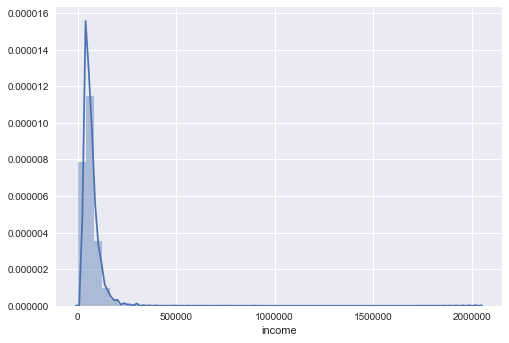

In [33]:
sns.distplot(df.income)

# Transform

- Skewness: Log Transform, SQRT transfrom
- Modelling: Linear model high values will have an impact
- Categorical Variables: Label Encode or One-Hot Encode
- Missing Value Categorical

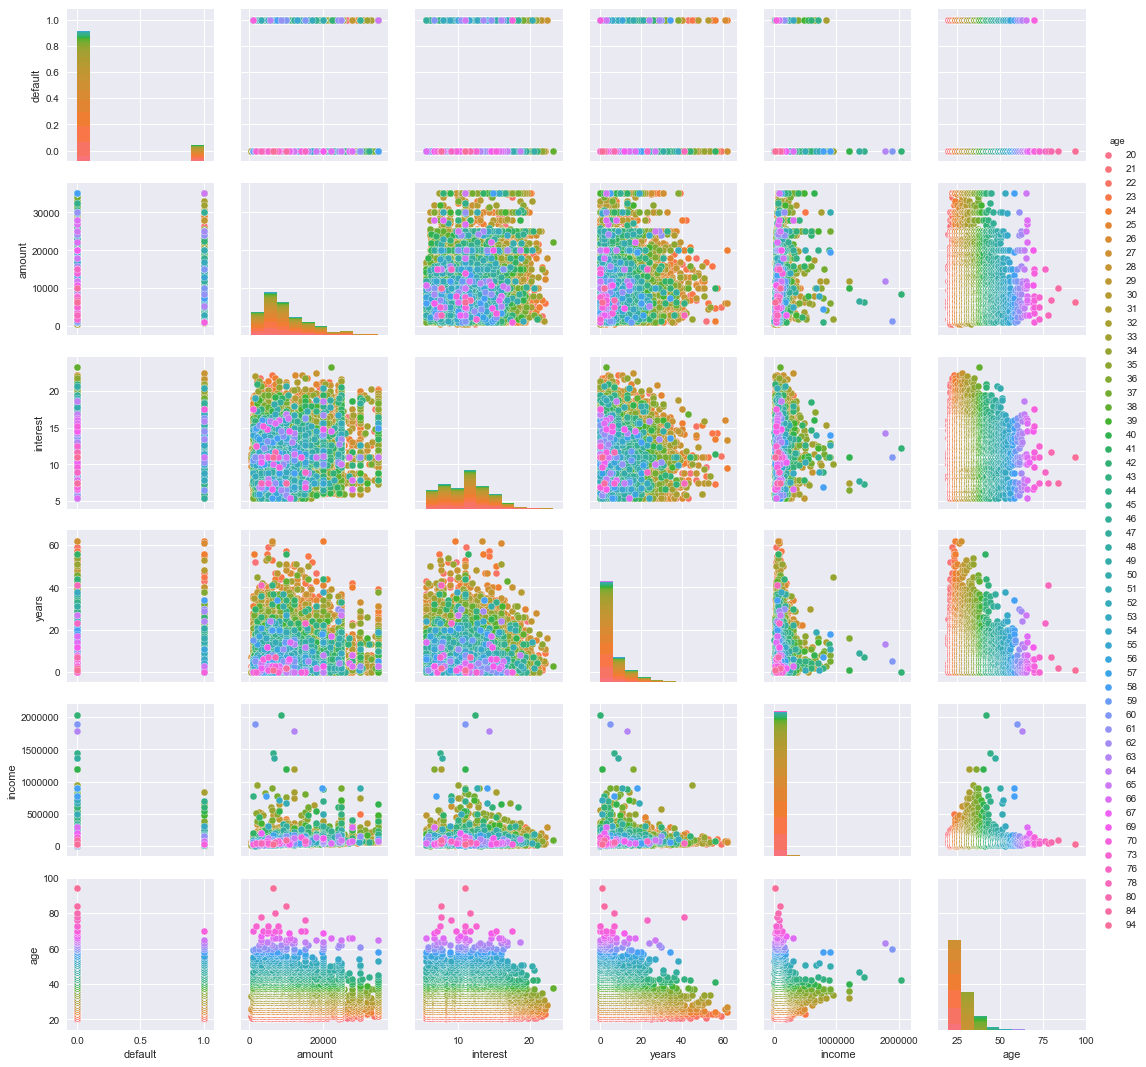

In [34]:
sns.pairplot(df, hue="age")

(array([  2.87000000e+02,   1.60300000e+03,   3.07900000e+03,
          4.37200000e+03,   4.33600000e+03,   4.29900000e+03,
          2.86200000e+03,   2.09800000e+03,   1.44500000e+03,
          1.20500000e+03,   7.70000000e+02,   8.03000000e+02,
          3.92000000e+02,   2.94000000e+02,   2.86000000e+02,
          1.53000000e+02,   1.47000000e+02,   1.13000000e+02,
          5.10000000e+01,   1.27000000e+02,   2.70000000e+01,
          4.50000000e+01,   3.10000000e+01,   2.10000000e+01,
          3.80000000e+01,   1.70000000e+01,   1.80000000e+01,
          1.20000000e+01,   5.00000000e+00,   4.20000000e+01,
          4.00000000e+00,   6.00000000e+00,   6.00000000e+00,
          1.00000000e+01,   4.00000000e+00,   2.00000000e+00,
          3.00000000e+00,   5.00000000e+00,   5.00000000e+00,
          3.00000000e+00,   2.00000000e+00,   2.00000000e+00,
          0.00000000e+00,   4.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   5.00000000e+00,   1.00000000e+00,
        

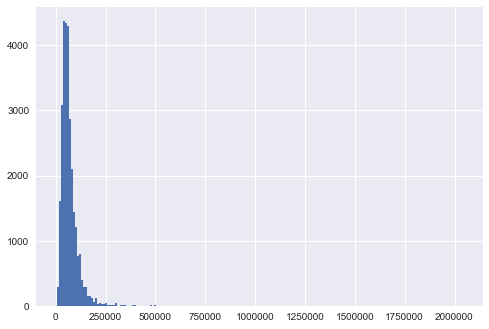

In [35]:
plt.hist(df.income, bins=200)

(array([  4.00000000e+00,   5.00000000e+00,   5.00000000e+00,
          4.00000000e+00,   2.20000000e+01,   5.20000000e+01,
          4.10000000e+01,   1.37000000e+02,   2.55000000e+02,
          2.78000000e+02,   5.63000000e+02,   9.11000000e+02,
          1.57300000e+03,   1.69700000e+03,   2.62900000e+03,
          2.97400000e+03,   3.41400000e+03,   3.61700000e+03,
          2.93100000e+03,   2.65200000e+03,   1.81700000e+03,
          1.35100000e+03,   8.58000000e+02,   5.06000000e+02,
          2.99000000e+02,   2.13000000e+02,   9.30000000e+01,
          7.90000000e+01,   2.90000000e+01,   2.00000000e+01,
          1.60000000e+01,   9.00000000e+00,   1.00000000e+01,
          1.10000000e+01,   7.00000000e+00,   1.00000000e+00,
          3.00000000e+00,   2.00000000e+00,   0.00000000e+00,
          3.00000000e+00]),
 array([ 3.60205999,  3.6697481 ,  3.7374362 ,  3.80512431,  3.87281241,
         3.94050052,  4.00818862,  4.07587672,  4.14356483,  4.21125293,
         4.27894104,

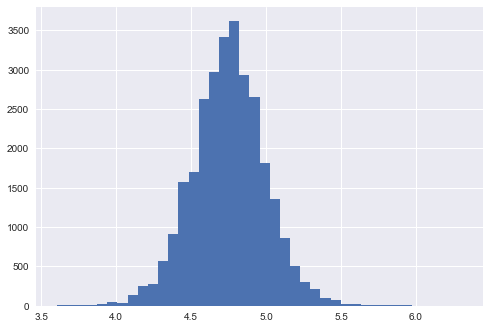

In [36]:
plt.hist(np.log10(df.income), bins=40)

In [37]:
df.head()

,default,amount,interest,grade,years,ownership,income,age
0,0,5000,10.650000,B,10.0,RENT,24000.0,33
1,0,2400,11.004567,C,25.0,RENT,12252.0,31
2,0,10000,13.490000,C,13.0,RENT,49200.0,24
3,0,5000,11.004567,A,3.0,RENT,36000.0,39
4,0,3000,11.004567,E,9.0,RENT,48000.0,24


In [38]:
df['income_log'] = np.log10(df.income)

In [39]:
df.head()

,default,amount,interest,grade,years,ownership,income,age,income_log
0,0,5000,10.650000,B,10.0,RENT,24000.0,33,4.380211
1,0,2400,11.004567,C,25.0,RENT,12252.0,31,4.088207
2,0,10000,13.490000,C,13.0,RENT,49200.0,24,4.691965
3,0,5000,11.004567,A,3.0,RENT,36000.0,39,4.556303
4,0,3000,11.004567,E,9.0,RENT,48000.0,24,4.681241


In [40]:
df.incomexx = np.log10(df.income)

In [41]:
df.head()

,default,amount,interest,grade,years,ownership,income,age,income_log
0,0,5000,10.650000,B,10.0,RENT,24000.0,33,4.380211
1,0,2400,11.004567,C,25.0,RENT,12252.0,31,4.088207
2,0,10000,13.490000,C,13.0,RENT,49200.0,24,4.691965
3,0,5000,11.004567,A,3.0,RENT,36000.0,39,4.556303
4,0,3000,11.004567,E,9.0,RENT,48000.0,24,4.681241


## Pre-processing

In [42]:
#One-Hot Encoding
df_wide = pd.get_dummies(df)

In [43]:
df_wide.head()

,default,amount,interest,years,income,age,income_log,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,ownership_MORTGAGE,ownership_OTHER,ownership_OWN,ownership_RENT
0,0,5000,10.650000,10.0,24000.0,33,4.380211,0,1,0,0,0,0,0,0,0,0,1
1,0,2400,11.004567,25.0,12252.0,31,4.088207,0,0,1,0,0,0,0,0,0,0,1
2,0,10000,13.490000,13.0,49200.0,24,4.691965,0,0,1,0,0,0,0,0,0,0,1
3,0,5000,11.004567,3.0,36000.0,39,4.556303,1,0,0,0,0,0,0,0,0,0,1
4,0,3000,11.004567,9.0,48000.0,24,4.681241,0,0,0,0,1,0,0,0,0,0,1


## EXPLORE

- Plot default vs one-continous
- Plot defualt vs one-of the categorical
- Correlation

In [44]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [45]:
pd.crosstab(df.default, df.ownership)

ownership,MORTGAGE,OTHER,OWN,RENT
default,,,,
0,10820,80,2049,12915
1,1181,17,252,1777


In [46]:
pd.crosstab(df.default, df.ownership,normalize="all")

ownership,MORTGAGE,OTHER,OWN,RENT
default,,,,
0,0.37,0.00,0.07,0.44
1,0.04,0.00,0.01,0.06


In [47]:
pd.crosstab(df.default, df.ownership,normalize="index")

ownership,MORTGAGE,OTHER,OWN,RENT
default,,,,
0,0.42,0.00,0.08,0.50
1,0.37,0.01,0.08,0.55


In [48]:
pd.crosstab(df.default, df.ownership,normalize="columns")

ownership,MORTGAGE,OTHER,OWN,RENT
default,,,,
0,0.90,0.82,0.89,0.88
1,0.10,0.18,0.11,0.12


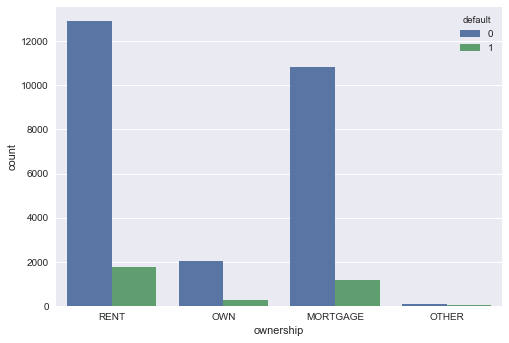

In [49]:
sns.countplot(x="ownership", hue="default", data=df)

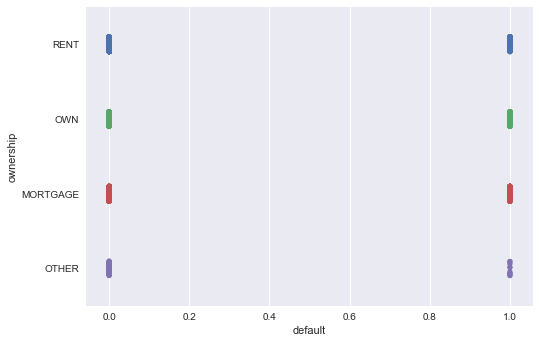

In [50]:
sns.stripplot(x="default", y="ownership", data=df, jitter=True)

In [51]:
df.corr()

,default,amount,interest,years,income,age,income_log
default,1.00,-0.01,0.14,-0.00,-0.05,-0.02,-0.08
amount,-0.01,1.00,0.14,0.09,0.32,0.05,0.43
interest,0.14,0.14,1.00,-0.06,0.02,0.01,0.01
years,-0.00,0.09,-0.06,1.00,0.12,0.01,0.18
income,-0.05,0.32,0.02,0.12,1.00,0.14,0.80
age,-0.02,0.05,0.01,0.01,0.14,1.00,0.12
income_log,-0.08,0.43,0.01,0.18,0.80,0.12,1.00


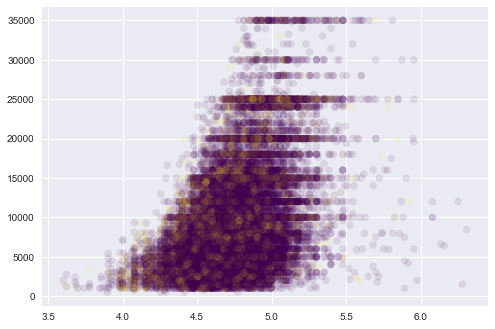

In [52]:
plt.scatter(x=df.income_log, y=df.amount, c=df.default, alpha=0.1, cmap=plt.cm.viridis)

/Users/amitkaps/miniconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


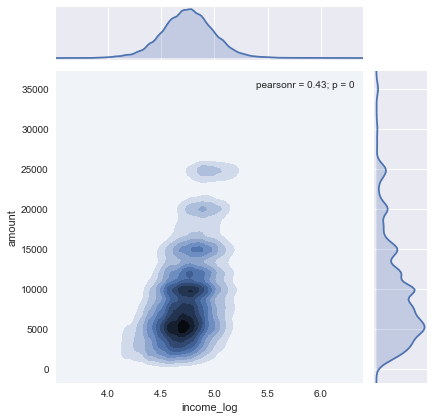

In [53]:
sns.jointplot(x="income_log", y="amount", kind="kde", data=df)

## Modelling

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
df_wide.head()

,default,amount,interest,years,income,age,income_log,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,ownership_MORTGAGE,ownership_OTHER,ownership_OWN,ownership_RENT
0,0,5000,10.65,10.00,24000.00,33,4.38,0,1,0,0,0,0,0,0,0,0,1
1,0,2400,11.00,25.00,12252.00,31,4.09,0,0,1,0,0,0,0,0,0,0,1
2,0,10000,13.49,13.00,49200.00,24,4.69,0,0,1,0,0,0,0,0,0,0,1
3,0,5000,11.00,3.00,36000.00,39,4.56,1,0,0,0,0,0,0,0,0,0,1
4,0,3000,11.00,9.00,48000.00,24,4.68,0,0,0,0,1,0,0,0,0,0,1


In [60]:
y = df_wide.default

In [93]:
X_2 = df_wide[['income_log','amount']].copy()

In [94]:
X_2['amount'] = X_2['amount']

In [95]:
X_2.head()

,income_log,amount
0,4.38,5000
1,4.09,2400
2,4.69,10000
3,4.56,5000
4,4.68,3000


In [96]:
clf_logistic_2 = LogisticRegression(random_state=100)

In [97]:
clf_logistic_2.fit(X_2,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=100, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [98]:
clf_logistic_2.intercept_

array([-0.08761907])

In [99]:
clf_logistic_2.coef_

array([[ -4.11074152e-01,  -2.93691669e-06]])

In [100]:
y_logistic_2_pred = clf_logistic_2.predict(X_2)

In [110]:
y_logistic_2_proba = clf_logistic_2.predict_proba(X_2)

In [111]:
y_logistic_2_proba

array([[ 0.87021886,  0.12978114],
       [ 0.85510611,  0.14489389],
       [ 0.88551583,  0.11448417],
       ..., 
       [ 0.89638375,  0.10361625],
       [ 0.90732652,  0.09267348],
       [ 0.86929091,  0.13070909]])

In [104]:
y_logistic_2_pred.sum()

0

In [109]:
y.value_counts()

0    25864
1     3227
Name: default, dtype: int64

In [103]:
y.sum()

3227

In [112]:
from sklearn import metrics

In [115]:
metrics.confusion_matrix(y, y_logistic_2_pred)

array([[25864,     0],
       [ 3227,     0]])

In [138]:
y_logistic_2_proba[:,1]

array([ 0.12978114,  0.14489389,  0.11448417, ...,  0.10361625,
        0.09267348,  0.13070909])

In [140]:
y_logistic_2_proba[:,1].min(), y_logistic_2_proba[:,1].max()

(0.062611844435607564, 0.17161752588859236)

In [148]:
def clf_metrics(data, target, model, model_name):
    model_fit = model.fit(data, target)
    pred = model_fit.predict(data)
    proba = model_fit.predict_proba(data)
    
    fpr, tpr, thresholds = metrics.roc_curve(target, proba[:,1])
    roc_auc = metrics.auc(fpr, tpr)
    
    print("Model: %s" % model_name)

    # Scores for the model
    print("accuracy: %.3f" % metrics.accuracy_score(target, pred))
    print("recall: %.3f" % metrics.precision_score(target, pred))
    print("precision: %.3f" % metrics.recall_score(target, pred))
    print("confusion_matrix:")
    print(metrics.confusion_matrix(target, pred))
    print("auc: %.3f" % metrics.auc(fpr, tpr))
    
    # ROC Curve
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    return roc_auc

Model: Logistic_2
accuracy: 0.889
recall: 0.000
precision: 0.000
confusion_matrix:
[[25864     0]
 [ 3227     0]]
auc: 0.572


/Users/amitkaps/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


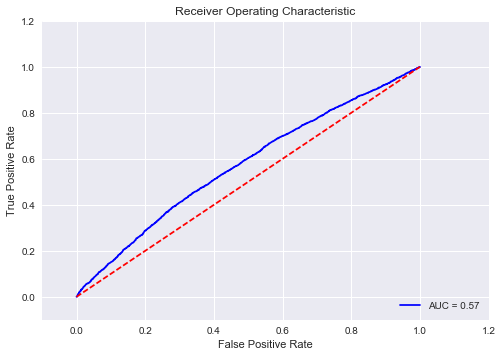

0.57235822146517201

In [149]:
clf_metrics(X_2,y,clf_logistic_2, "Logistic_2")

In [158]:
X= df_wide.iloc[:,1:]

In [159]:
clf_logistic_all = LogisticRegression()

Model: Logistic_All
accuracy: 0.889
recall: 0.000
precision: 0.000
confusion_matrix:
[[25864     0]
 [ 3227     0]]
auc: 0.553


/Users/amitkaps/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


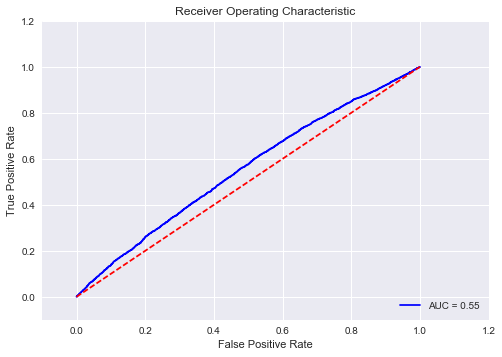

0.5531919915582364

In [160]:
clf_metrics(X,y,clf_logistic_all, "Logistic_All")

In [161]:
LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [164]:
clf_logistic_all_balanced = LogisticRegression(class_weight="balanced")

Model: Logistic_all_balanced
accuracy: 0.593
recall: 0.160
precision: 0.628
confusion_matrix:
[[15220 10644]
 [ 1199  2028]]
auc: 0.648


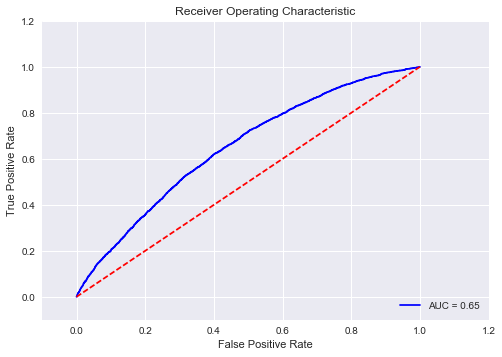

0.64847425799809466

In [165]:
clf_metrics(X,y,clf_logistic_all_balanced, "Logistic_all_balanced")

In [168]:
clf_logistic_all_balanced_l1 = LogisticRegression(class_weight="balanced", penalty="l1")

Model: Logistic_Balanced_All
accuracy: 0.599
recall: 0.164
precision: 0.637
confusion_matrix:
[[15355 10509]
 [ 1171  2056]]
auc: 0.658


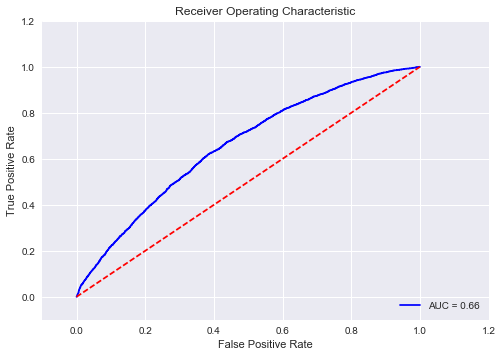

0.65759160140751016

In [169]:
clf_metrics(X,y, clf_logistic_all_balanced_l1, "Logistic_Balanced_All")

In [170]:
clf_logistic_all_balanced.fit(X,y).coef_

array([[ -2.95785001e-06,   1.43006945e-01,   8.04988258e-03,
         -3.21570893e-06,  -1.03401536e-03,  -2.85699645e-01,
         -1.61525231e-01,  -1.46451763e-02,   3.71863728e-02,
          4.93885255e-02,   1.75688417e-02,   1.54297763e-02,
          7.03134850e-03,  -2.58412729e-02,   5.94249814e-03,
         -1.60588466e-02,  -1.36079209e-02]])

In [171]:
clf_logistic_all_balanced_l1.fit(X,y).coef_

array([[  1.43353816e-06,   6.63056867e-02,   9.43995829e-03,
          1.31006991e-06,  -4.40416425e-03,  -1.41158532e+00,
         -4.37155531e-01,   0.00000000e+00,   2.25502391e-01,
          3.74915880e-01,   4.80858128e-01,   8.48241433e-01,
          1.17724290e+00,   1.61353981e+00,   2.01778135e+00,
          1.49116711e+00,   1.56499498e+00]])

In [173]:
pd.crosstab(df.default, df.grade, normalize=)

grade,A,B,C,D,E,F,G
default,,,,,,,
0,9084,8344,4903,2651,692,155,35
1,565,985,844,580,176,56,21


In [174]:
df_wide.corr()

,default,amount,interest,years,income,age,income_log,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,ownership_MORTGAGE,ownership_OTHER,ownership_OWN,ownership_RENT
default,1.00,-0.01,0.14,-0.00,-0.05,-0.02,-0.08,-0.12,-0.01,0.06,0.08,0.05,0.04,0.04,-0.03,0.01,-0.00,0.03
amount,-0.01,1.00,0.14,0.09,0.32,0.05,0.43,-0.12,0.04,-0.03,0.07,0.09,0.07,0.05,0.13,0.01,-0.03,-0.11
interest,0.14,0.14,1.00,-0.06,0.02,0.01,0.01,-0.76,-0.00,0.36,0.45,0.31,0.19,0.13,-0.13,0.02,-0.02,0.13
years,-0.00,0.09,-0.06,1.00,0.12,0.01,0.18,0.05,-0.00,-0.04,-0.01,-0.02,-0.02,0.01,0.21,-0.01,0.03,-0.22
income,-0.05,0.32,0.02,0.12,1.00,0.14,0.80,-0.00,-0.00,-0.02,0.00,0.03,0.03,0.02,0.23,0.01,-0.05,-0.20
age,-0.02,0.05,0.01,0.01,0.14,1.00,0.12,-0.00,-0.01,0.00,0.01,0.00,0.01,0.01,0.03,-0.01,-0.00,-0.03
income_log,-0.08,0.43,0.01,0.18,0.80,0.12,1.00,0.01,-0.00,-0.04,0.00,0.04,0.03,0.02,0.33,0.00,-0.10,-0.28
grade_A,-0.12,-0.12,-0.76,0.05,-0.00,-0.00,0.01,1.00,-0.48,-0.35,-0.25,-0.12,-0.06,-0.03,0.13,-0.01,0.02,-0.14
grade_B,-0.01,0.04,-0.00,-0.00,-0.00,-0.01,-0.00,-0.48,1.00,-0.34,-0.24,-0.12,-0.06,-0.03,-0.03,0.00,-0.01,0.04
grade_C,0.06,-0.03,0.36,-0.04,-0.02,0.00,-0.04,-0.35,-0.34,1.00,-0.18,-0.09,-0.04,-0.02,-0.06,-0.00,-0.01,0.07
